## Reading the data and understanding

In [529]:
# importing required libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [530]:
# reading the data using pandas library
bikes = pd.read_csv('day.csv')
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [531]:
# checking number of data entries in the dataset
bikes.shape

(730, 16)

In [532]:
# checking for null values if any
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [533]:
#checking for the statistical values of the dataset
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [534]:
#Renaming the columns for better interpretaion
bikes.rename(columns = {'yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
bikes.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [535]:
#Dropping instant and dteday columns as they don't infer much and are not important
bikes.drop(['instant','dteday'], axis=1, inplace=True)
bikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [536]:
#Changing values of column season, month, weathersit, weekday

bikes['season'] = bikes['season'].map({1: 'Spring', 2: 'Summer',3:'Fall', 4:'Winter' })
bikes['month'] = bikes['month'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bikes['weathersit'] = bikes['weathersit'].map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Heavy Rain'})
bikes['weekday'] = bikes['weekday'].map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,Spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,Spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,Spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Visualization

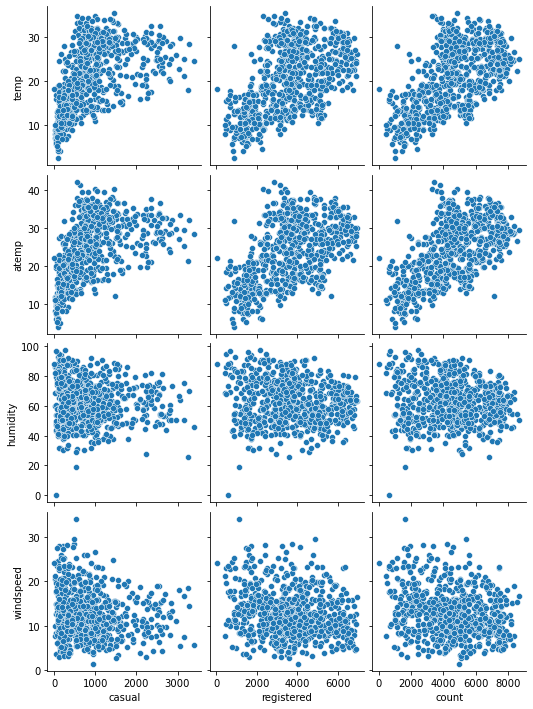

In [537]:
# visualization for non-categorical values
non_categorical = ['temp','atemp','humidity','windspeed']
y_var = ['casual','registered','count']
sns.pairplot(bikes,x_vars = bikes[y_var], y_vars = bikes[non_categorical])
plt.show()

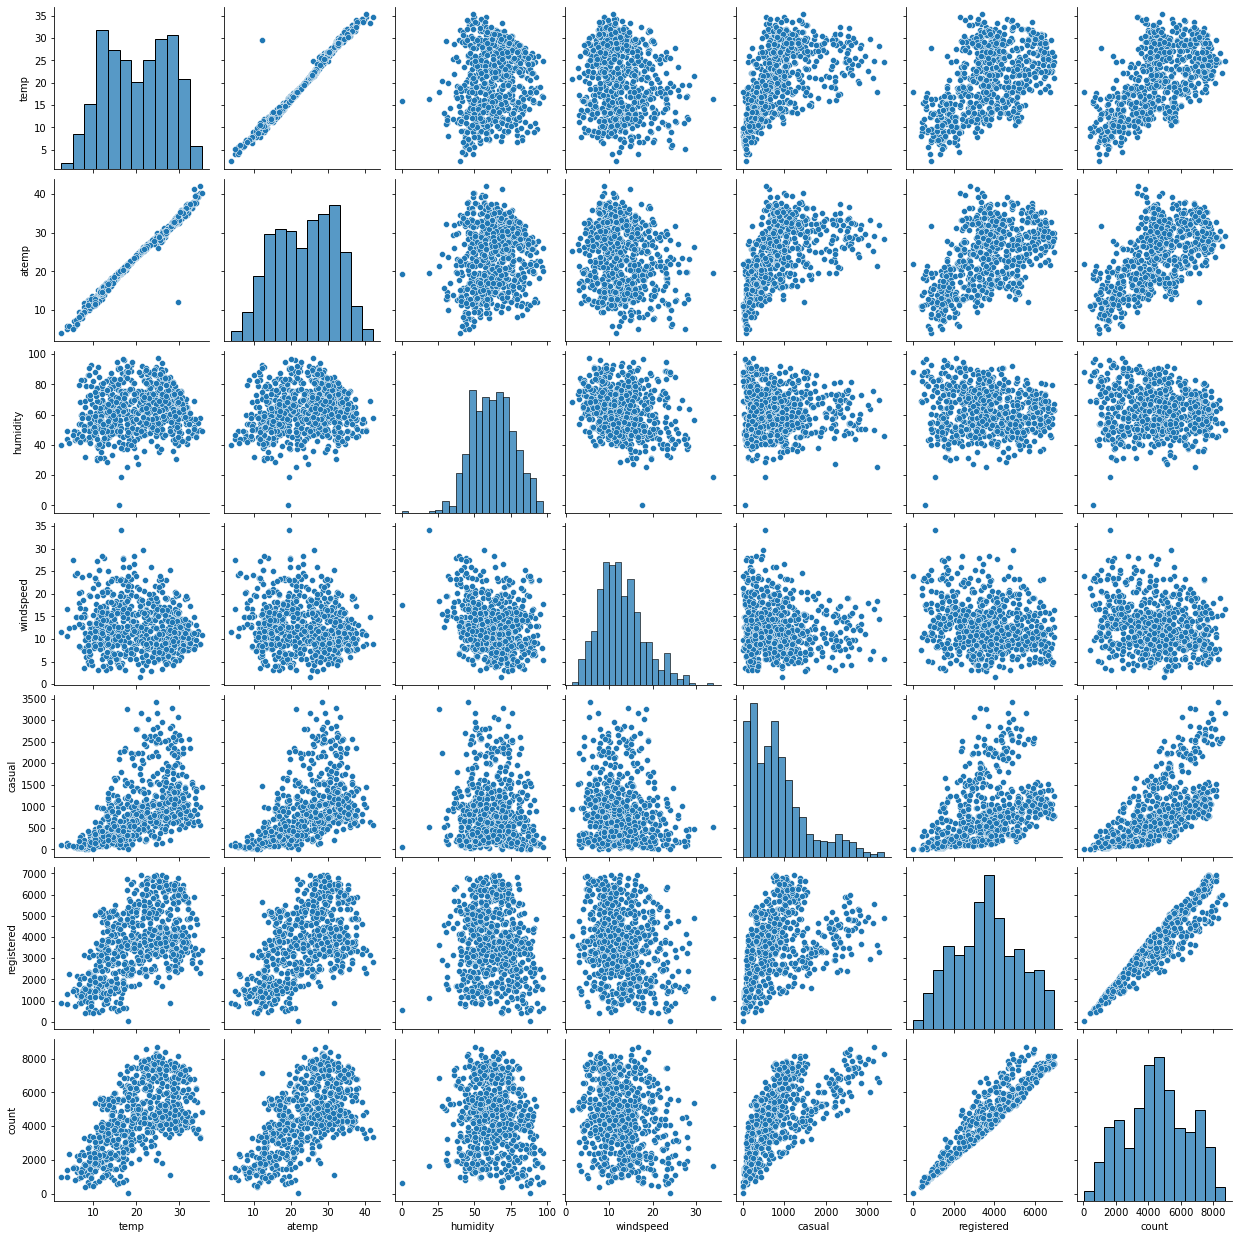

In [538]:
# visualization for non-categorical values
non_categorical = ['temp','atemp','humidity','windspeed', 'casual','registered','count']
sns.pairplot(bikes[non_categorical])
plt.show()

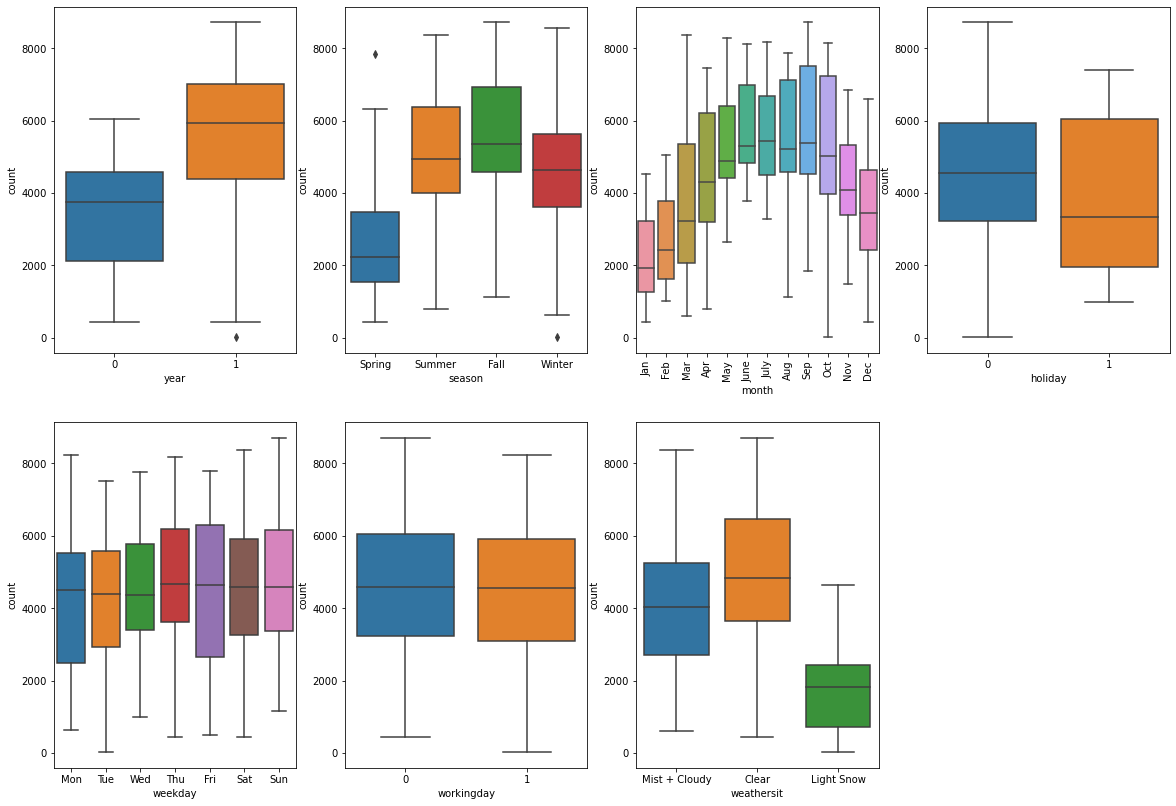

In [539]:
#visualization for categorical values  
plt.figure(figsize=(20, 14))
plt.subplot(2,4,1)
sns.boxplot(x = 'year', y = 'count', data = bikes)
plt.subplot(2,4,2)
sns.boxplot(x = 'season', y = 'count', data = bikes)
plt.subplot(2,4,3)
sns.boxplot(x = 'month', y = 'count', data = bikes)
plt.xticks(rotation = 90)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'count', data = bikes)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'count', data = bikes)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'count', data = bikes)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'count', data = bikes)
plt.show()

## Inference 

By seeing the above two plots we can comment a few things:
1. The count variable seems to have linear relation with temp and atemp. But, its also known that temp and atemp will be related linearly as they are dependant variables. So we will consider temp as of now. This also tells us that a Linear Regression Model can be built for this.
2. From the categorical values box plot we can say that the bookings was more in 2019 than 2018.
3. We can also see that the bookings are more in the months where weather conditions are comfortable and pleasant i.e from May-Oct the bookings are considerably higher.
4. We can also see that the medians of the bookings does not vary considerably depending on which day of the week it is.

## Multivariate Analysis

Lets do a comparison of two or more colums and try to understand the data better through visualization.

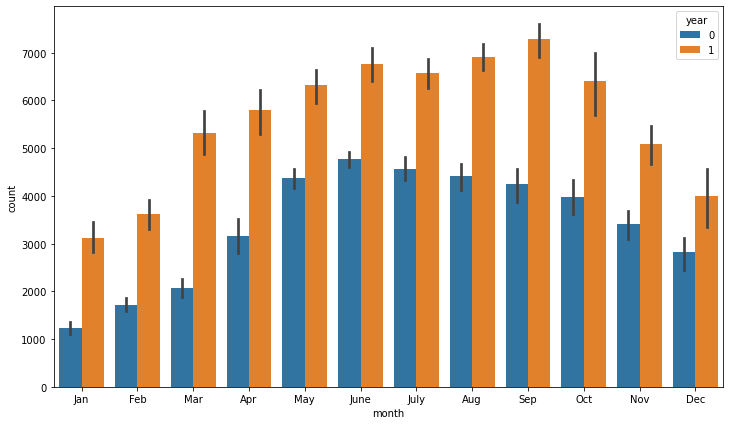

In [540]:
plt.figure(figsize=(12,7))
sns.barplot('month', 'count', hue='year', data=bikes)
plt.show()

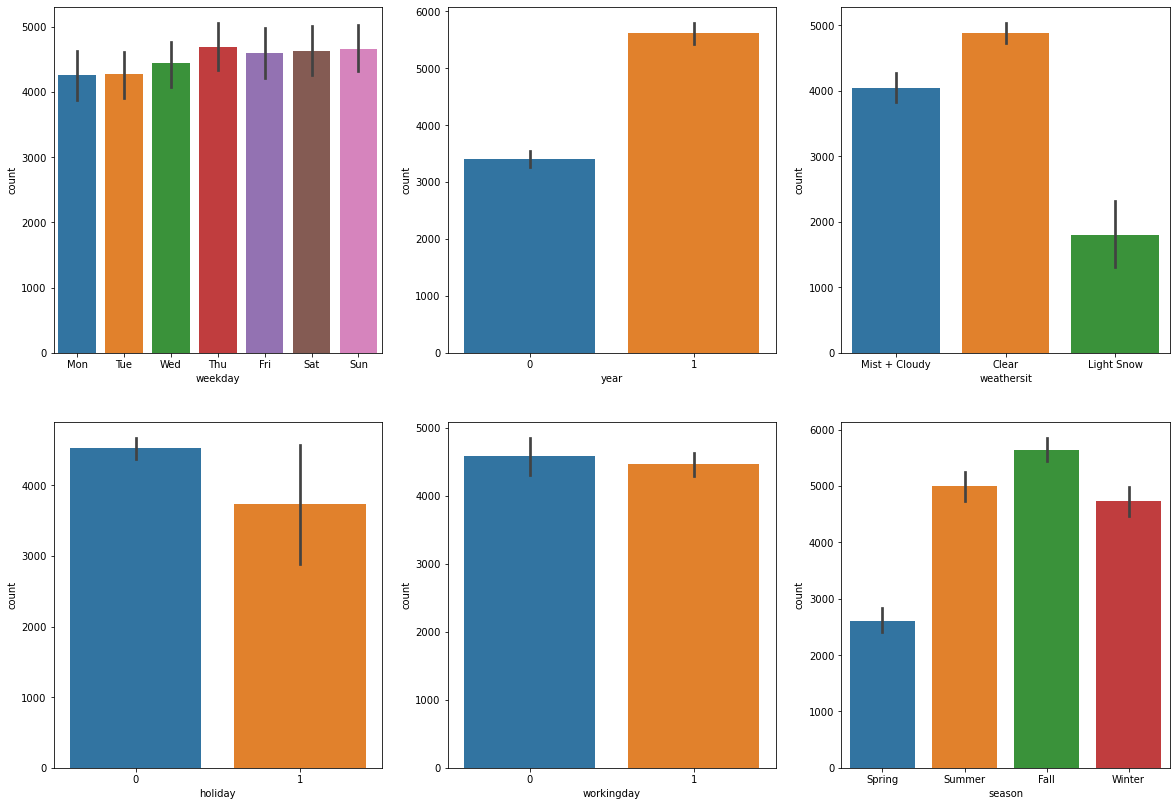

In [541]:
plt.figure(figsize=(20, 14))
plt.subplot(2,3,1)
sns.barplot('weekday', 'count', data=bikes)
plt.subplot(2,3,2)
sns.barplot('year', 'count', data=bikes)
plt.subplot(2,3,3)
sns.barplot('weathersit', 'count', data=bikes)
plt.subplot(2,3,4)
sns.barplot('holiday', 'count', data=bikes)
plt.subplot(2,3,5)
sns.barplot('workingday', 'count', data=bikes)
plt.subplot(2,3,6)
sns.barplot('season', 'count', data=bikes)
plt.show()

## Inference
From the above plot we can see that:

1. The monthly distribution of bookings over the 2 years. Clearly, 2019 had more bookings than 2018.
2. We can see that the bookings doesn't vary very significantly when we consider the days of the week, holiday or working day.
3. We can also see that the bookings are more in the months where weather conditions are comfortable and pleasant i.e from May-Oct the bookings are considerably higher.

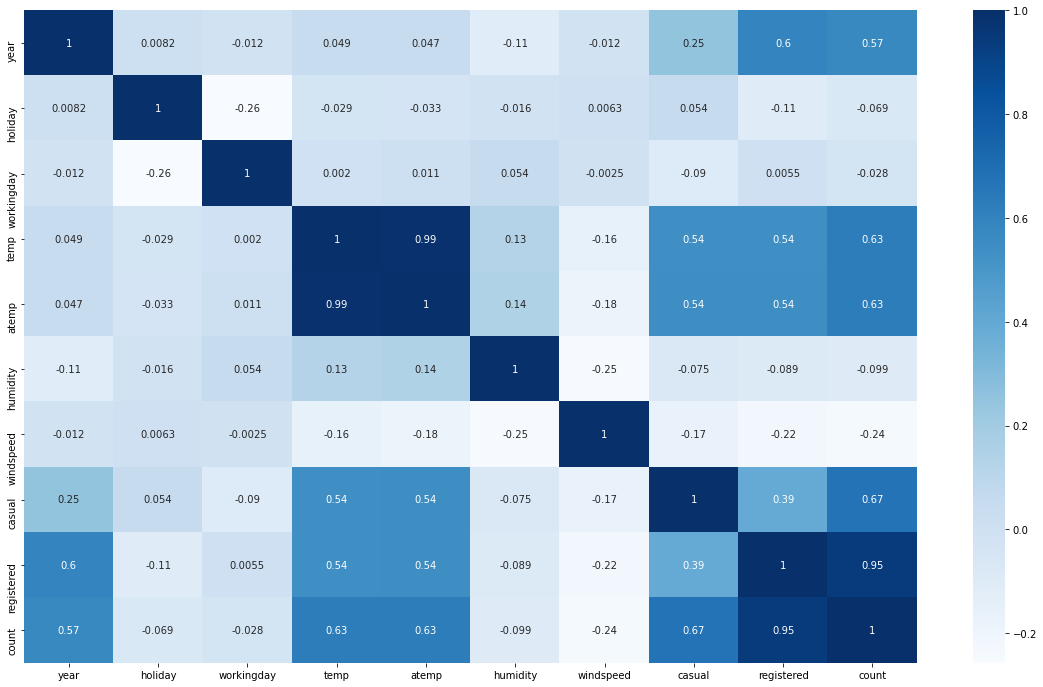

In [542]:
# Lets check the correlation between the variables
plt.figure(figsize = [20,12])
sns.heatmap(bikes.corr(), annot = True, cmap = 'Blues')
plt.show()

Here we see some high correlation between count and temp. Hence we can consider building a Multiple Linear Regression Model.

Please note that here we are not considering registered,casual as they both sum up to count and also not considering atemp as its highly dependant on temp alone.
Since we are considering count as our target variable we can drop the registered and casual columns.

In [543]:
bikes.drop(['registered','casual'], axis = 1, inplace = True)
bikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,Spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Preparing the data for Modelling

Creating Dummy variables

In [544]:
months = pd.get_dummies(bikes['month'], drop_first=True)
weekdays = pd.get_dummies(bikes['weekday'], drop_first=True)
weather_sit = pd.get_dummies(bikes['weathersit'], drop_first=True)
seasons = pd.get_dummies(bikes['season'], drop_first=True)

In [545]:
# Concating the above DFs to the original bikes dataframe
bikes = pd.concat([months,weekdays,weather_sit,seasons,bikes],axis=1)
bikes.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [546]:
# Since we created the dummies for the above 4 columns we will drop those 4 columns
bikes.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
bikes.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Summer,Winter,year,holiday,workingday,temp,atemp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [547]:
bikes.shape

(730, 30)

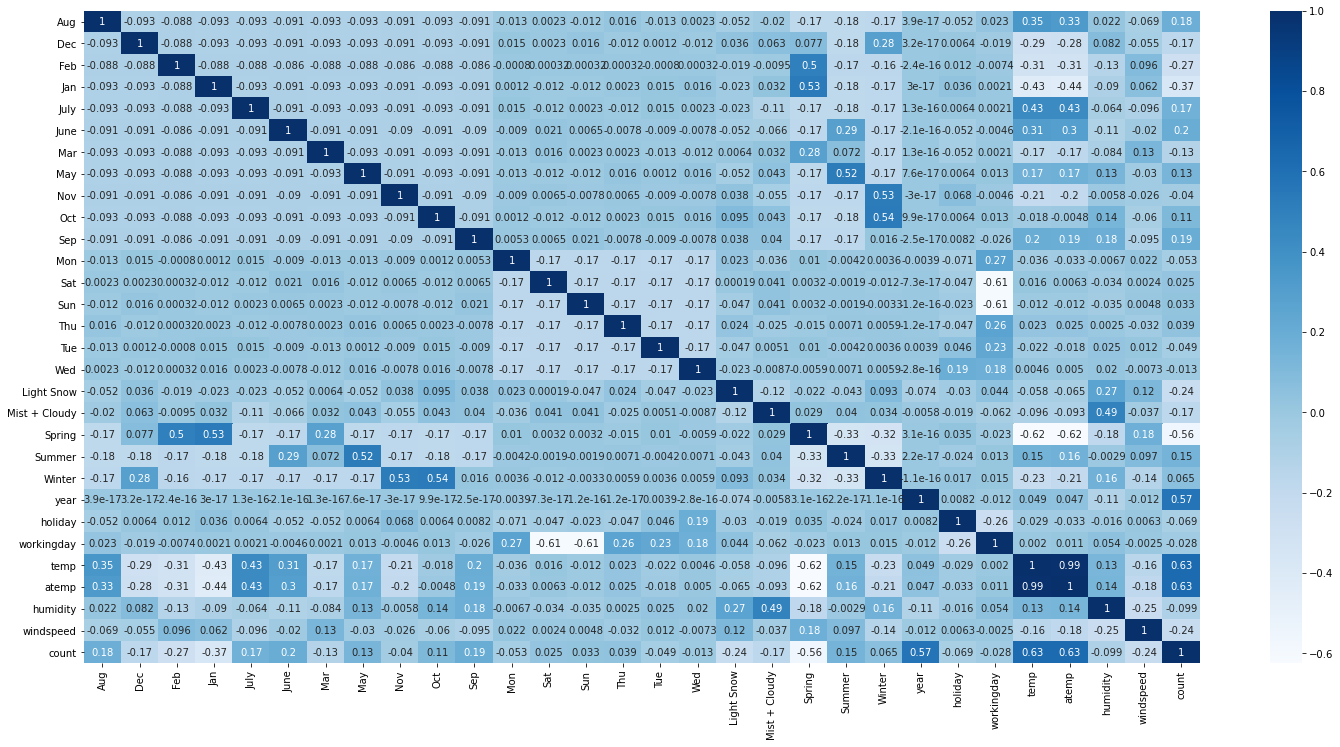

In [548]:
# Lets check the correlation between the variables
plt.figure(figsize = [25,12])
sns.heatmap(bikes.corr(), annot = True, cmap = 'Blues')
plt.show()

From the above heatmap we see that temp, atemp, year, summer, Sep, May, June, July and Aug have some good correlation with the target variable count.

## Splitting of the dataset (train and test sets)

In [549]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, random_state = 100)

In [550]:
print(bikes_train.shape)
print(bikes_test.shape)

(510, 30)
(220, 30)


## Rescaling the variables 

It is important to rescale all the values between a specific scaled value so that the interpretation is easier and also faster convergence for gradient descent methods.

Using Min-Max Scaling method for rescaling the values between 0 and 1.

In [551]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaling_vars=['temp', 'atemp','humidity','windspeed','count']

bikes_train[scaling_vars] = scaler.fit_transform(bikes_train[scaling_vars])
bikes_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Summer,Winter,year,holiday,workingday,temp,atemp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095


In [552]:
bikes_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Summer,Winter,year,holiday,workingday,temp,atemp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,...,0.247059,0.247059,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,...,0.431725,0.431725,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Defining X and y values in order to build the model

In [553]:
y_train = bikes_train.pop('count')
X_train = bikes_train

## Building the linear regression model

Since we have around 30 columns it will be very tedious to either start building a model with one variable and then adding to it or with chosing all the variables and then removing one by one till we get a considerable fit.

Hence, we will be using RFE to build a model.
RFE -> Recursive Feature Elimination

In [554]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [555]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 12),
 ('Mar', False, 15),
 ('May', False, 9),
 ('Nov', True, 1),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', False, 5),
 ('Sun', False, 6),
 ('Thu', False, 14),
 ('Tue', False, 7),
 ('Wed', False, 11),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [556]:
# columns chosen by rfe

col = X_train.columns[rfe.support_]
col

Index(['Dec', 'Jan', 'July', 'Nov', 'Sep', 'Light Snow', 'Mist + Cloudy',
       'Spring', 'Summer', 'Winter', 'year', 'holiday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [557]:
# columns rejected
X_train.columns[~rfe.support_]

Index(['Aug', 'Feb', 'June', 'Mar', 'May', 'Oct', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'workingday', 'atemp'],
      dtype='object')

In [558]:
#Building a model using the above columns
X_train_rfe = X_train[col]

In [559]:
#importing statsmodel to understand the model better
import statsmodels.api as sm  

#adding the constant
X_train_mlr1 = sm.add_constant(X_train_rfe)

In [560]:
# Build 1st fit model
mlr1 = sm.OLS(y_train,X_train_rfe).fit()

In [561]:
print(mlr1.summary())

                                 OLS Regression Results                                
Dep. Variable:                  count   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              1114.
Date:                Thu, 10 Mar 2022   Prob (F-statistic):                        0.00
Time:                        23:19:11   Log-Likelihood:                          476.59
No. Observations:                 510   AIC:                                     -923.2
Df Residuals:                     495   BIC:                                     -859.7
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [562]:
#Removing constant
X_train_mlr1.drop('const',1,inplace=True)

## Checking VIF

Variance Inflation Factor gives us an idea about how much a variable is correlated with another variable. Higher the VIF value more that variable is correlated with others and hence can be dropped.

We can have:

    1. High p-value and high VIF => These can be dropped right away
    2. High Low condition:
        a. High p-value but low VIF => Drop these variables before considering the other combination
        b. Low p-value but high VIF => Drop these variables after dropping the above case
    3. Low p-value and low VIF => These will remain in the model

In [563]:
#import statement
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [564]:
# Calculationg the VIF for this model
vif = pd.DataFrame()
X = X_train_mlr1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,humidity,30.89
12,temp,17.79
14,windspeed,4.72
7,Spring,4.37
9,Winter,4.06
8,Summer,2.82
6,Mist + Cloudy,2.32
10,year,2.09
3,Nov,1.85
1,Jan,1.75


From considering the OLS Regression Results and VIF we arrive at 2a condition mentioned under Checking VIF section.

Since Dec is having high p-value and low VIF we will drop Dec first.

In [565]:
X2 = X_train_mlr1.drop('Dec', axis = 1)

In [566]:
# Building the second model
X_train_mlr2 = sm.add_constant(X2)
mlr2 = sm.OLS(y_train,X_train_mlr2).fit()
print(mlr2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          4.41e-189
Time:                        23:19:11   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3032      0.035      8.598

In [567]:
#Removing constant
X_train_mlr2.drop('const',1,inplace=True)

In [568]:
#Calculating the VIF
vif = pd.DataFrame()
X = X_train_mlr2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,humidity,29.09
11,temp,16.80
13,windspeed,4.72
6,Spring,4.37
8,Winter,3.78
7,Summer,2.80
5,Mist + Cloudy,2.29
9,year,2.09
0,Jan,1.67
2,Nov,1.60


From considering the OLS Regression Results and VIF we arrive at 2a condition mentioned under Checking VIF section again.

Since Nov is having high p-value and low VIF we will drop it first.

In [569]:
X3 = X_train_mlr2.drop('Nov', axis = 1)

In [570]:
#Building next model
X_train_mlr3 = sm.add_constant(X3)
mlr3 = sm.OLS(y_train,X_train_mlr3).fit()
print(mlr3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          7.59e-190
Time:                        23:19:11   Log-Likelihood:                 511.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     496   BIC:                            -935.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2964      0.035      8.483

In [571]:
#Removing constant
X_train_mlr3.drop('const',1,inplace=True)

In [572]:
#Calculating the VIF
vif = pd.DataFrame()
X = X_train_mlr3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,humidity,29.02
10,temp,16.71
12,windspeed,4.66
5,Spring,4.34
7,Winter,3.36
6,Summer,2.79
4,Mist + Cloudy,2.29
8,year,2.09
0,Jan,1.67
1,July,1.59


Humidity has remained very high after 2 iterations, hence dropping humidity.

In [573]:
X4 = X_train_mlr3.drop('humidity', axis = 1)

In [574]:
#Building next model
X_train_mlr4 = sm.add_constant(X4)
mlr4 = sm.OLS(y_train,X_train_mlr4).fit()
print(mlr4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          8.14e-187
Time:                        23:19:11   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2154      0.030      7.088

In [575]:
#Removing constant
X_train_mlr4.drop('const',1,inplace=True)

In [576]:
#Calculating the VIF
vif = pd.DataFrame()
X = X_train_mlr4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,5.13
11,windspeed,4.62
5,Spring,2.75
6,Summer,2.24
8,year,2.07
7,Winter,1.78
0,Jan,1.61
1,July,1.59
4,Mist + Cloudy,1.56
2,Sep,1.34


From considering the OLS Regression Results and VIF we arrive at 2a condition mentioned under Checking VIF section again.

Since Jan is having high p-value and low VIF we will drop it.

In [577]:
X5 = X_train_mlr4.drop('Jan', axis = 1)

In [578]:
#Building next model
X_train_mlr5 = sm.add_constant(X5)
mlr5 = sm.OLS(y_train,X_train_mlr5).fit()
print(mlr5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          5.06e-187
Time:                        23:19:11   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1994      0.030      6.746

In [579]:
#Removing constant
X_train_mlr5.drop('const',1,inplace=True)

In [580]:
#Calculating the VIF
vif = pd.DataFrame()
X = X_train_mlr5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.09
10,windspeed,4.60
5,Summer,2.23
4,Spring,2.08
7,year,2.07
6,Winter,1.78
0,July,1.58
3,Mist + Cloudy,1.55
1,Sep,1.34
2,Light Snow,1.08


From considering the OLS Regression Results and VIF we arrive at 2a condition mentioned under Checking VIF section again.

Since July is having high p-value and low VIF we will drop it.

In [581]:
X6 = X_train_mlr5.drop('July', axis = 1)

In [582]:
#Building next model
X_train_mlr6 = sm.add_constant(X6)
mlr6 = sm.OLS(y_train,X_train_mlr6).fit()
print(mlr6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          1.47e-186
Time:                        23:19:11   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1909      0.030      6.447

In [583]:
#Removing constant
Xvif = X_train_mlr6.drop('const',1)

In [584]:
#Calculating the VIF
vif = pd.DataFrame()
X = Xvif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,windspeed,4.60
8,temp,3.84
6,year,2.07
3,Spring,1.99
4,Summer,1.90
5,Winter,1.63
2,Mist + Cloudy,1.55
0,Sep,1.23
1,Light Snow,1.08
7,holiday,1.04


Now we have have arrived at our model, we have all the p-values less than 0.05 and the VIF value within 5.
Hence mlr6 model can be considered as a fit.

## Residual Analysis of the train data

Now we check if the errors of the train data is normally distributed or not by using the model we built just now.

In [585]:
y_train_pred = mlr6.predict(X_train_mlr6)

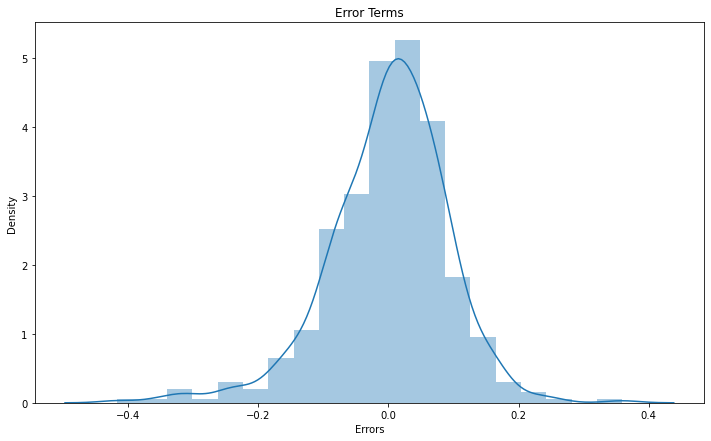

In [586]:
# Plotting the histogram of the error terms
plt.figure(figsize=[12,7])
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms')
plt.xlabel('Errors')
plt.show()

We see that the error terms are normally distributed.

In [587]:
error_terms = (y_train - y_train_pred)

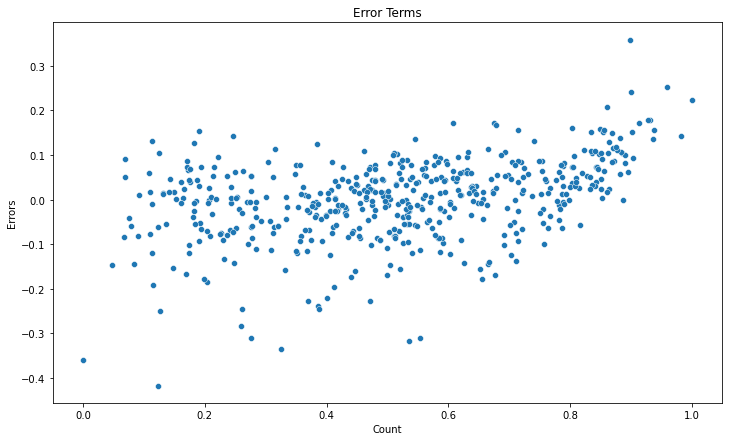

In [588]:
#plotting to check if error terms are independent of each other
plt.figure(figsize=[12,7])
sns.scatterplot(y_train, error_terms)
plt.title('Error Terms')
plt.xlabel('Count')
plt.ylabel('Errors')
plt.show()

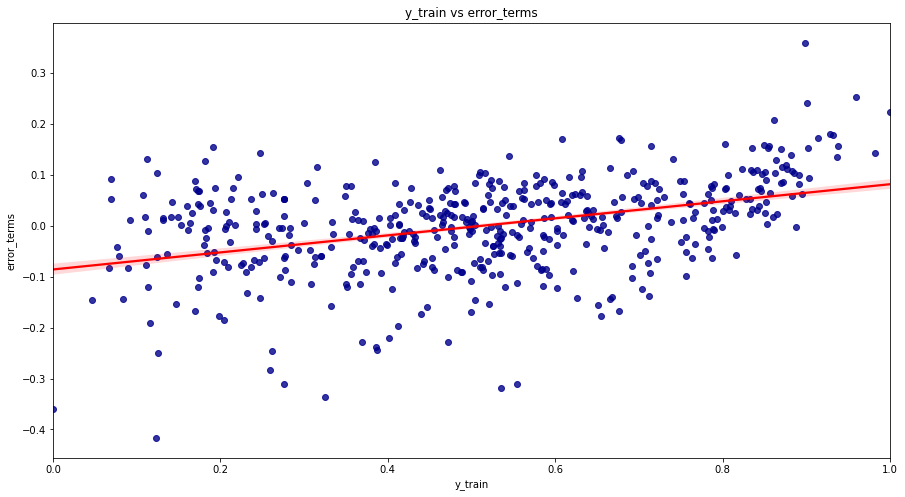

In [589]:
#plot to check Homoscedasticity
plt.figure(figsize=(15,8))
sns.regplot(x=y_train, y=error_terms , ci=68, fit_reg=True,scatter_kws={"color": "darkblue"}, line_kws={"color": "red"})
plt.title('y_train vs error_terms')
plt.xlabel('y_train')
plt.ylabel('error_terms')                         
plt.show()

## Making predictions using the model

Now we will consider the model built so far and make the predictions on test dataset.

We will also scale and use the same columns used in train data set to make predictions for test dataset.

In [590]:
#Numeric variables to be scaled
scaling_vars=['temp', 'atemp','humidity','windspeed','count']

#Transforming on train data
bikes_test[scaling_vars] = scaler.transform(bikes_test[scaling_vars])
bikes_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Summer,Winter,year,holiday,workingday,temp,atemp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029


In [591]:
bikes_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Summer,Winter,year,holiday,workingday,temp,atemp,humidity,windspeed,count
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,...,0.263636,0.236364,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,...,0.441609,0.425817,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [592]:
# Defining X_test and y_test
y_test = bikes_test.pop('count')
X_test = bikes_test

In [593]:
X_train_mlr6.columns

Index(['const', 'Sep', 'Light Snow', 'Mist + Cloudy', 'Spring', 'Summer',
       'Winter', 'year', 'holiday', 'temp', 'windspeed'],
      dtype='object')

In [594]:
X_train_mlr6.drop('const',1,inplace=True)

In [595]:
#Considering only the above mentioned columns in X_test
X_test_mlr = X_test[X_train_mlr6.columns]
X_test_mlr.columns

Index(['Sep', 'Light Snow', 'Mist + Cloudy', 'Spring', 'Summer', 'Winter',
       'year', 'holiday', 'temp', 'windspeed'],
      dtype='object')

In [596]:
#Adding the constant
X_test_mlr = sm.add_constant(X_test_mlr)
X_test_mlr.head()

,const,Sep,Light Snow,Mist + Cloudy,Spring,Summer,Winter,year,holiday,temp,windspeed
184,1.0,0,0,1,0,0,0,0,1,0.831783,0.084219
535,1.0,0,0,0,0,1,0,1,0,0.901354,0.153728
299,1.0,0,0,1,0,0,1,0,0,0.511964,0.334206
221,1.0,0,0,0,0,0,0,0,0,0.881625,0.339570
152,1.0,0,0,0,0,1,0,0,0,0.817246,0.537414


In [597]:
y_pred_mlr6 = mlr6.predict(X_test_mlr)

#### Let's find R-squared and Adjusted R-squared for test dataset

In [598]:
#Calculate r2
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_mlr6)

0.8038195990728842

In [599]:
#Calculate adjusted r2
Adj_r2 = 1-(1-0.8038195990728842)*(11-1)/(11-1-1)
print(Adj_r2)

0.7820217767476492


## Model Evaluation

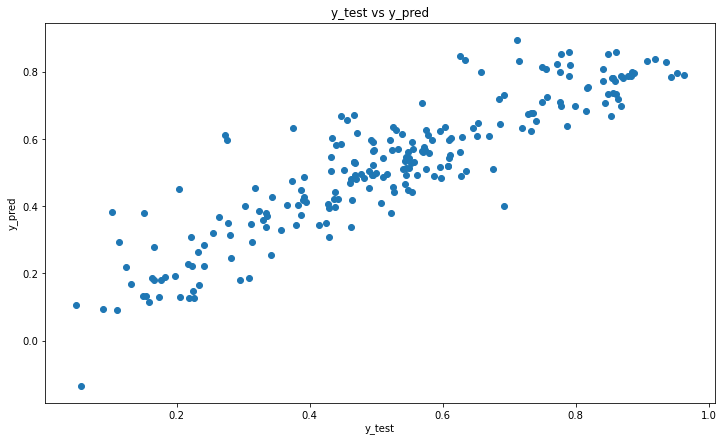

In [600]:
# Plotting y_test and y_pred_mlr6 to understand the spread

plt.figure(figsize=[12,7])
plt.scatter(y_test, y_pred_mlr6)
plt.title('y_test vs y_pred')              
plt.xlabel('y_test')
plt.ylabel('y_pred')   
plt.show()

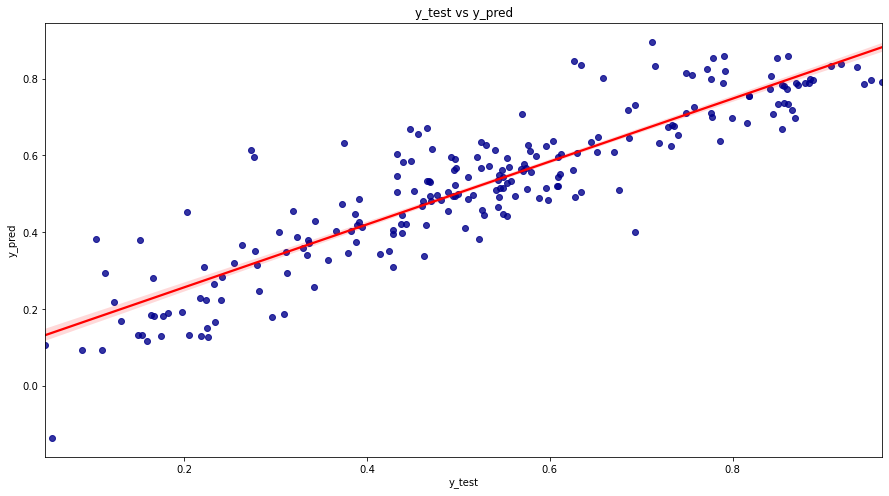

In [601]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred_mlr6, ci=68, fit_reg=True,scatter_kws={"color": "darkblue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')                         
plt.show()